In [4]:
#import necessary inputs
import json
import sys
import os

# Add the project directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '/Users/adamdvorak/Ematiq/nba-data-project')))


from analysis.src import data_loader
from analysis.src import model_stats
from analysis.src import plot_results

STATISTIC = 'points'

DB_PATH = '/Users/adamdvorak/Ematiq/nba-data-project/database/player_data.db'  # Ensure the full path is correct
RESULTS_DIR = '/Users/adamdvorak/Ematiq/nba-data-project/analysis/results/'
RESULTS_FILE = f'/Users/adamdvorak/Ematiq/nba-data-project/analysis/results/predicted_vs_actual_{STATISTIC}.csv'
RMSE_FILE = f'/Users/adamdvorak/Ematiq/nba-data-project/analysis/results/rmse_values_{STATISTIC}.json'

# Combine player data from the SQLite database into a single dataset
combined_df = data_loader.combine_player_data(DB_PATH, stat=STATISTIC)

print('Total of {} players loaded into dataframe'.format(combined_df['player_id'].nunique()))

Total of 420 players loaded into dataframe


In [ ]:
combined_df.head()

In [5]:
# Predict player statistics using linear and random forest models
results_df, rmse_data = model_stats.predict_player_stat(combined_df, stat=STATISTIC)

# Save the results to a CSV file
results_df.to_csv(RESULTS_FILE, index=False)
print(f"Results saved to {RESULTS_FILE}")

# Save the RMSE values to a JSON file
with open(RMSE_FILE, 'w') as rmse_file:
    json.dump(rmse_data, rmse_file, indent=4)
print(f"RMSE values saved to {RMSE_FILE}")

Results saved to /Users/adamdvorak/Ematiq/nba-data-project/analysis/results/predicted_vs_actual_points.csv
RMSE values saved to /Users/adamdvorak/Ematiq/nba-data-project/analysis/results/rmse_values_points.json


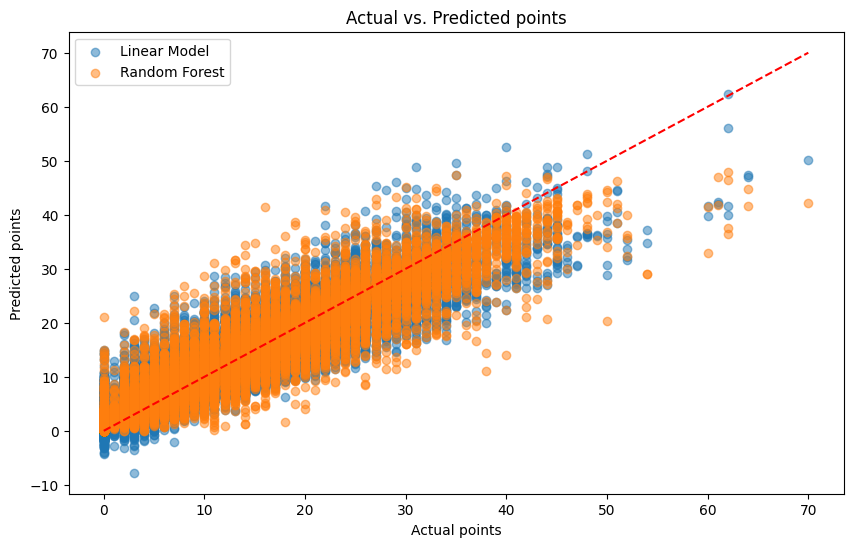

In [7]:
#generate plots
plot_results.generate_graph(results_df, RESULTS_DIR, STATISTIC)